## High school contact and friendship network dataset

Data corresponds to student contacts and friendship relations from a high school in France. The dataset provides the id, class, and gender of each student. The nodes are the students and the edges is the contact between the students. Link to data source: http://www.sociopatterns.org/datasets/high-school-contact-and-friendship-networks/

###Introduction

For this project, we will be working with a high school contact and friendship network dataset obtained from a previously completed research project on comparison between data collected using wearable sensors, contact diaries, and friendship surveys. The dataset contains information from 327 individuals who took part in the study and includes five datasets broken into the following:

1) Dynamical contact list

2) Directed, weighted contact network from contact diaries

3) Directed, unweighted friendship network from surveys

4) List of pairs of students for which the existence of a Facebook link is known

5) Metadata

Our task is first to explore the data and identify the groups, then calculate degree centrality and eigenvector centrality, then, using the understanding gained,  compare the centrality measures across our categorical groups.

###Exploratory Data Analysis

In [64]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [65]:
# Import data
school_data = pd.read_csv('https://raw.githubusercontent.com/SaneSky109/DATA620/main/Data/High-School_data_2013.csv',
                          sep = ' ',
                         header = None,
                         names = ["Time_sec", "StudentID1", "StudentID2", "Class1", "Class2"])
attribute_data = pd.read_csv('http://www.sociopatterns.org/wp-content/uploads/2015/09/metadata_2013.txt',
                   sep = '\t',
                   header = None,
                   names = ["studentID", "Class", "Gender"])

In [66]:
school_data.head(10)

,Time_sec,StudentID1,StudentID2,Class1,Class2
0,1385982020,454,640,MP,MP
1,1385982020,1,939,2BIO3,2BIO3
2,1385982020,185,258,PC*,PC*
3,1385982020,55,170,2BIO3,2BIO3
4,1385982020,9,453,PC,PC
5,1385982020,9,45,PC,PC
6,1385982020,14,190,PC*,PC*
7,1385982020,400,637,2BIO1,2BIO1
8,1385982020,255,275,2BIO3,2BIO3
9,1385982020,176,533,PC*,PC*


In [67]:
attribute_data.head(10)

,studentID,Class,Gender
0,650,2BIO1,F
1,498,2BIO1,F
2,627,2BIO1,F
3,857,2BIO1,F
4,487,2BIO1,F
5,28,2BIO2,M
6,927,2BIO1,F
7,72,2BIO1,F
8,400,2BIO1,F
9,945,2BIO1,F


As can be seen from the tables above, the dataset has a wide variety of numeric and categorical data. We’ll dive deeper into this data now.

The first dataset gives the contacts of the students of nine classes during 5 days, as measured by the SocioPatterns infrastructure. It shows the active contacts during 20-second intervals of the data collection.

The second dataset contains a list in which each line gives class and gender of the student.

In [68]:
# Randomly assign 'Gender' to unknown students
attribute_data.index[attribute_data['Gender'] == "Unknown"].tolist()

attribute_data.loc[320,'Gender'] = "F"
attribute_data.loc[321,'Gender'] = "M"
attribute_data.loc[322,'Gender'] = "F"
attribute_data.loc[323,'Gender'] = "F"
attribute_data.loc[324,'Gender'] = "M"
attribute_data.loc[325,'Gender'] = "M"
attribute_data.loc[326,'Gender'] = "M"

In [69]:
# Create Weights. Students can contact eachother multiple times in a class. Weights can capture how often the students communicate.
weighted_data = school_data.groupby(['StudentID1', 'StudentID2']).size().reset_index(name="Contacts")

# Create weights using 1/contacts to have people who are more social with eachother closer than people who hardly socialize with eachother
weighted_data["Weighted_Distance"] = 1 / weighted_data["Contacts"]

weighted_data.head(35)

,StudentID1,StudentID2,Contacts,Weighted_Distance
0,1,55,8,0.125000
1,1,63,2,0.500000
2,1,101,1,1.000000
3,1,106,4,0.250000
4,1,117,18,0.055556
5,1,170,8,0.125000
6,1,179,1,1.000000
7,1,196,38,0.026316
8,1,199,2,0.500000
9,1,202,1,1.000000


In [70]:
# Add edges and weights to Graph object
G = nx.Graph()
for i in weighted_data.index:
    G.add_edge(weighted_data.iat[i,0],
               weighted_data.iat[i,1], 
               weight = weighted_data.iat[i,3])
    


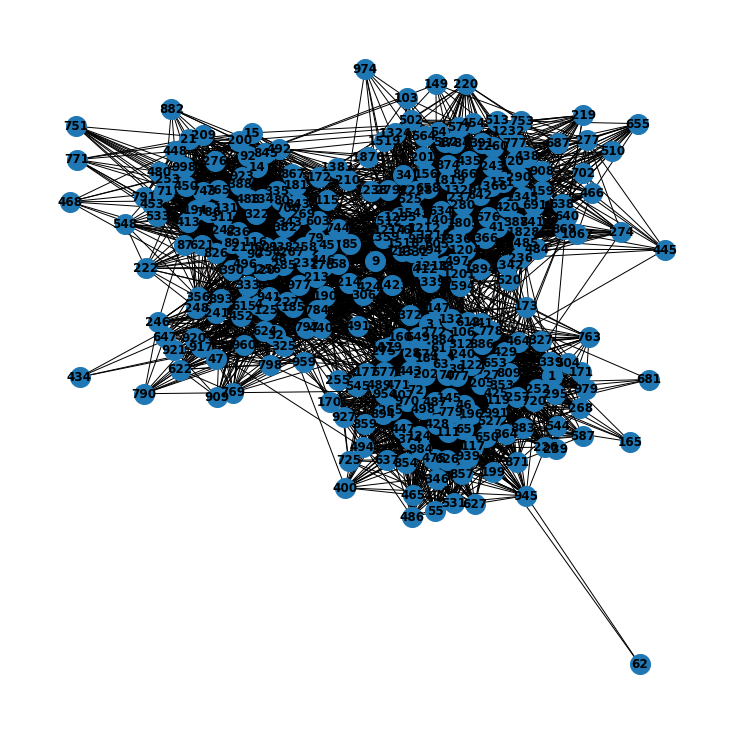

In [71]:
plt.figure(figsize = (10,10))
nx.draw(G, with_labels = True, node_size = 400, font_color = 'black', font_weight = 'bold')